# Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Reading Dataset

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

In [8]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

# Convert Categorical data to Numerical

In [7]:
#  One-Hot Encoding 
df_encoded = pd.get_dummies(df, columns=['diagnosis'], prefix='diagnosis')
df_encoded['diagnosis_M'] = df_encoded['diagnosis_M'].astype(int)
df_encoded['diagnosis_B'] = df_encoded['diagnosis_B'].astype(int)
df_encoded.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.10220   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.13235          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.13235          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                0.078710  ...           184.60      2019.0           0.16220   
1                0.056670  ...           158.80      1956.0           0.12380   
2                0.059990  ...           152.50      1709.0           0.14440   
3                0.061575  ...            98.87       567.7           0.14345   
4                0.058830  ...           152.20      1575.0           0.13740   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0            0.66560           0.7119                0.2654          0.3103   
1            0.18660           0.2416                0.1860          0.2750   
2            0.42450           0.4504                0.2430          0.3613   
3            0.35635           0.6869                0.2575          0.3103   
4            0.20500           0.4000                0.1625          0.2364   

   fractal_dimension_worst  diagnosis_B  diagnosis_M  
0                  0.11890            0            1  
1                  0.08902            0            1  
2                  0.08758            0            1  
3                  0.08760            0            1  
4                  0.07678            0            1  

[5 rows x 32 columns]

#  Find Outliers

# Replacing outliers with the classed median

In [8]:
#  جایگزینی داده‌های پرت با میانه کلاس‌بندی‌شده
def replace_outliers_with_class_median(df, column, target_column='diagnosis_M'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # محاسبه میانه برای هر کلاس
    median_by_class = df.groupby(target_column)[column].median()
    
    # جایگزینی پرت‌ها با میانه کلاس مربوطه
    for class_label in df[target_column].unique():
        mask = (df[target_column] == class_label) & ((df[column] < lower_bound) | (df[column] > upper_bound))
        df.loc[mask, column] = median_by_class[class_label]
    return df

# اعمال روی تمام ستون‌های عددی (به جز هدف)
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    if column != 'diagnosis_M':
        df_encoded = replace_outliers_with_class_median(df_encoded, column)

print("\nدیتاست بعد از جایگزینی پرت‌ها با میانه کلاس‌بندی‌شده:")
print(df_encoded.head())


دیتاست بعد از جایگزینی پرت‌ها با میانه کلاس‌بندی‌شده:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.10220   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.13235        0.151075              0.14710        0.24190   
1           0.07864        0.086900              0.07017        0.18120   
2           0.15990        0.197400              0.12790        0.20690   
3           0.13235        0.241400              0.10520        0.18975   
4           0.13280        0.198000              0.10430        0.18090   

   fractal_dimension_mean  ...  perim

# Train and Test Data

In [9]:
X = df_encoded.drop(['diagnosis_M'], axis=1)
y = df_encoded['diagnosis_M']

# 4. تقسیم اولیه به Train و (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.702, random_state=100)  # حداقل 70% آموزش

# 5. تقسیم دوم به Validation و Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=100)  # 15% از کل برای تست، بقیه برای اعتبارسنجی

# چک دقیق درصدها
total_samples = len(X)
print(f"تعداد کل نمونه‌ها: {total_samples}")
print(f"تعداد نمونه‌های آموزش: {len(X_train)} ({len(X_train)/total_samples*100:.2f}%)")
print(f"تعداد نمونه‌های تست: {len(X_test)} ({len(X_test)/total_samples*100:.2f}%)")
print(f"تعداد نمونه‌های اعتبارسنجی: {len(X_val)} ({len(X_val)/total_samples*100:.2f}%)")

تعداد کل نمونه‌ها: 569
تعداد نمونه‌های آموزش: 399 (70.12%)
تعداد نمونه‌های تست: 85 (14.94%)
تعداد نمونه‌های اعتبارسنجی: 85 (14.94%)


# Normalize

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Choose 20 important features

In [106]:
selector = SelectKBest(score_func=f_classif, k=25)
X_train_scaled_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_scaled_selected = selector.transform(X_val_scaled)
X_test_scaled_selected = selector.transform(X_test_scaled)

# گرفتن نام ویژگی‌های انتخاب‌شده
all_feature_names = X.columns.tolist()
selected_mask = selector.get_support()
feature_names = [all_feature_names[i] for i in range(len(selected_mask)) if selected_mask[i]]
print("\nویژگی‌های انتخاب‌شده:", feature_names)


ویژگی‌های انتخاب‌شده: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Model fitting

In [163]:
model = DecisionTreeClassifier(max_depth=3,min_samples_split=20,min_samples_leaf=12,ccp_alpha=0.001,class_weight='balanced',random_state=100)
model.fit(X_train_scaled_selected, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=3,
                       min_samples_leaf=12, min_samples_split=20,
                       random_state=100)

# Cross-Validation

# Accuracy on validation data

In [164]:
y_val_pred = model.predict(X_val_scaled_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"دقت روی دیتای اعتبارسنجی: {val_accuracy:.3f}")

دقت روی دیتای اعتبارسنجی: 0.918


# Accuracy on train data

In [165]:
y_train_pred = model.predict(X_train_scaled_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"دقت روی دیتای آموزشی: {train_accuracy:.3f}")

دقت روی دیتای آموزشی: 0.945


# Evaluation on test data

In [166]:
y_test_pred = model.predict(X_test_scaled_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"دقت روی دیتای تست: {test_accuracy:.3f}")
print("\nگزارش طبقه‌بندی برای دیتای تست:")
print(classification_report(y_test, y_test_pred, target_names=['خوش‌خیم', 'بدخیم']))

دقت روی دیتای تست: 0.918

گزارش طبقه‌بندی برای دیتای تست:
              precision    recall  f1-score   support

     خوش‌خیم       0.94      0.92      0.93        49
       بدخیم       0.89      0.92      0.90        36

    accuracy                           0.92        85
   macro avg       0.91      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85



# Confusion Matrix

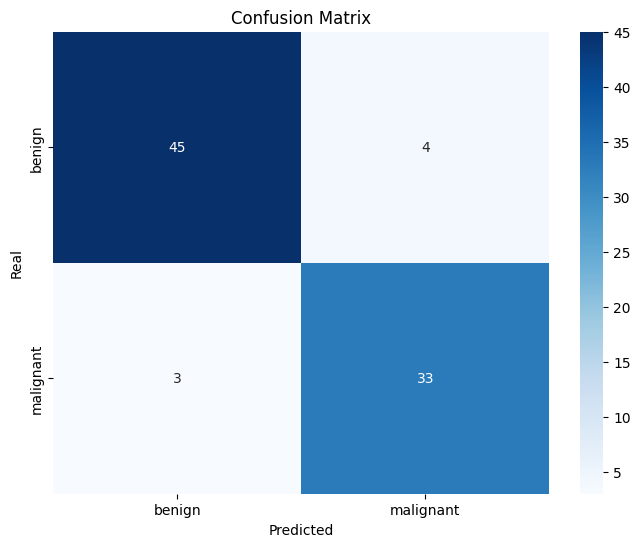


گزارش طبقه‌بندی برای دیتای تست:
              precision    recall  f1-score   support

     خوش‌خیم       0.94      0.92      0.93        49
       بدخیم       0.89      0.92      0.90        36

    accuracy                           0.92        85
   macro avg       0.91      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85



In [170]:
# ماتریس درهم‌ریختگی برای دیتای تست (گرافیکی)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print("\nگزارش طبقه‌بندی برای دیتای تست:")
print(classification_report(y_test, y_test_pred, target_names=['خوش‌خیم', 'بدخیم']))

# Decision tree

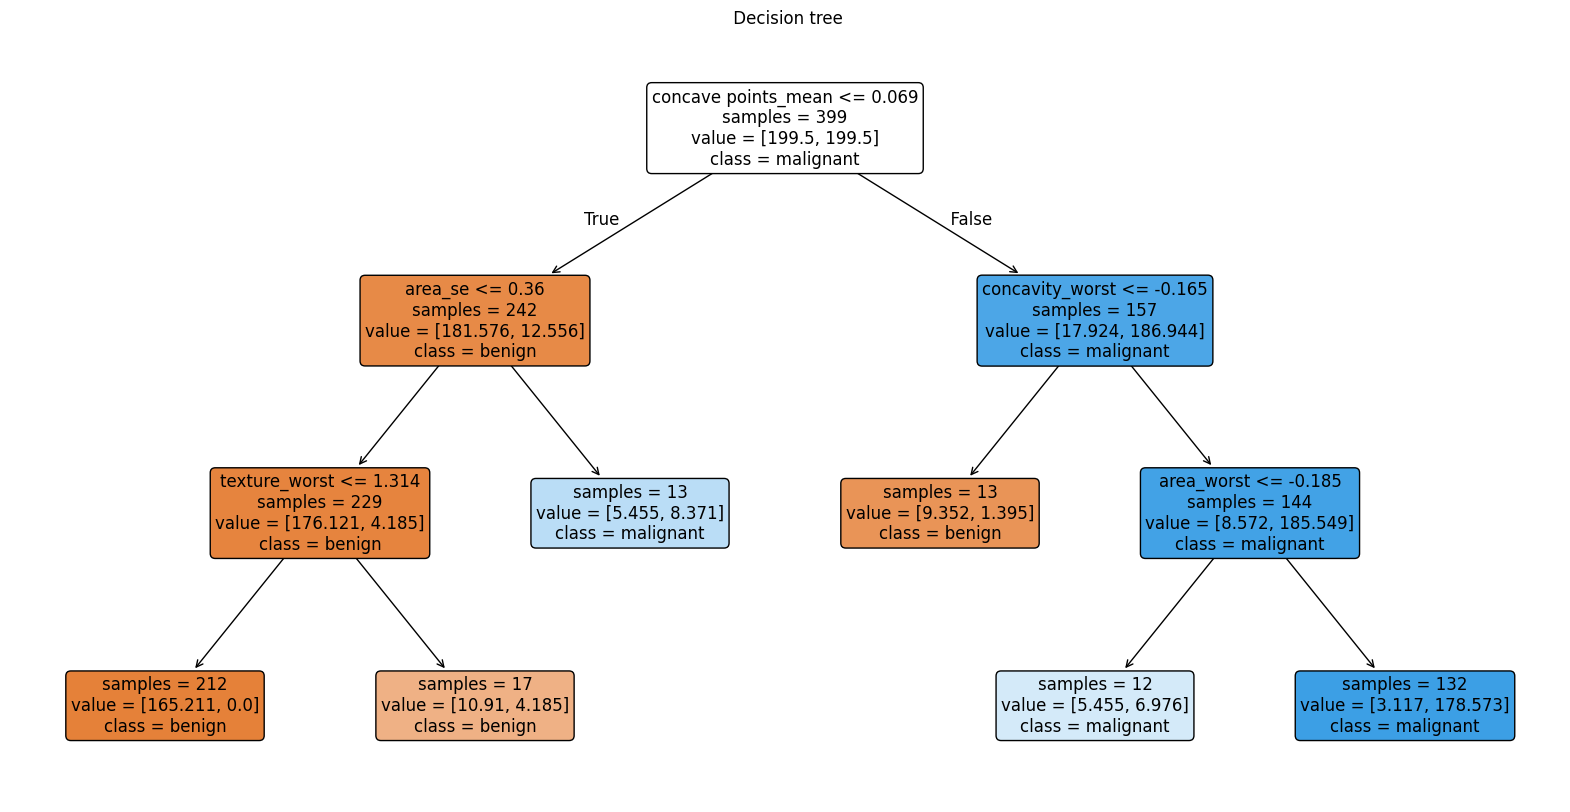

In [169]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
plot_tree(model, feature_names=feature_names, class_names=[ 'benign','malignant'], filled=True, rounded=True, impurity=False, fontsize=12)
plt.title(" Decision tree")
plt.show()

# optimal parameters


چند ویژگی مهم بر اساس اهمیت مدل:
       Feature  Importance
7    Feature 7    0.876670
17  Feature 17    0.074072
11  Feature 11    0.049258
0    Feature 0    0.000000
1    Feature 1    0.000000
4    Feature 4    0.000000
5    Feature 5    0.000000
3    Feature 3    0.000000
2    Feature 2    0.000000
8    Feature 8    0.000000


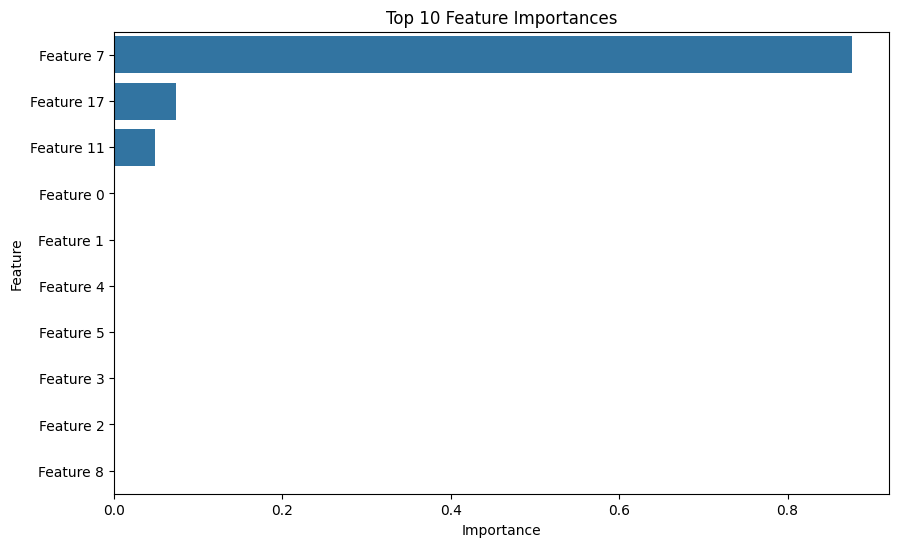

In [176]:
# استخراج و نمایش اهمیت ویژگی‌ها 
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': grid.best_estimator_.feature_importances_})
print("\nچند ویژگی مهم بر اساس اهمیت مدل:")
print(feature_importance.sort_values(by='Importance', ascending=False).head(10))

# رسم نمودار اهمیت ویژگی‌ها
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False).head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()